Enabling multithreading for training...
Loading images...
Loaded 24320 images.
Encoding labels...
Encoded labels: ['Dataset\\Dataset of Artificial Maksed Original\\(0-10)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(0-10)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(11-20)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(11-20)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(21-30)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(21-30)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(31-40)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(31-40)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(41-50)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(41-50)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(51-60)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(51-60)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(61-70)_Female'
 'Dataset\\Dataset of Artificial Maksed Or

c:\Users\M.Ubaid Ullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.2118 - loss: 2.3676 - val_accuracy: 0.3990 - val_loss: 1.4546
Epoch 2/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5100 - loss: 1.2360 - val_accuracy: 0.5627 - val_loss: 1.0603
Epoch 3/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.6567 - loss: 0.8812 - val_accuracy: 0.6860 - val_loss: 0.7985
Epoch 4/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7441 - loss: 0.6680 - val_accuracy: 0.6960 - val_loss: 0.7537
Epoch 5/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8009 - loss: 0.5170 - val_accuracy: 0.7359 - val_loss: 0.6503
Epoch 6/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8353 - loss: 0.4297 - val_accuracy: 0.7469 - val_loss: 0.6283
Epoch 7/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8645 - loss: 0.3620 - val_accuracy: 0.7767 - val_loss: 0.5693
Epoch 8/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8862 - loss: 0

c:\Users\M.Ubaid Ullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.2189 - loss: 2.2761 - val_accuracy: 0.3543 - val_loss: 1.5168
Epoch 2/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5238 - loss: 1.2055 - val_accuracy: 0.6220 - val_loss: 0.9638
Epoch 3/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.7056 - loss: 0.7912 - val_accuracy: 0.6888 - val_loss: 0.7897
Epoch 4/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7715 - loss: 0.5933 - val_accuracy: 0.7166 - val_loss: 0.6946
Epoch 5/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8057 - loss: 0.5135 - val_accuracy: 0.7418 - val_loss: 0.6520
Epoch 6/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8363 - loss: 0.4248 - val_accuracy: 0.7307 - val_loss: 0.6878
Epoch 7/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8637 - loss: 0.3610 - val_accuracy: 0.7736 - val_loss: 0.5864
Epoch 8/300
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8816 - loss: 0

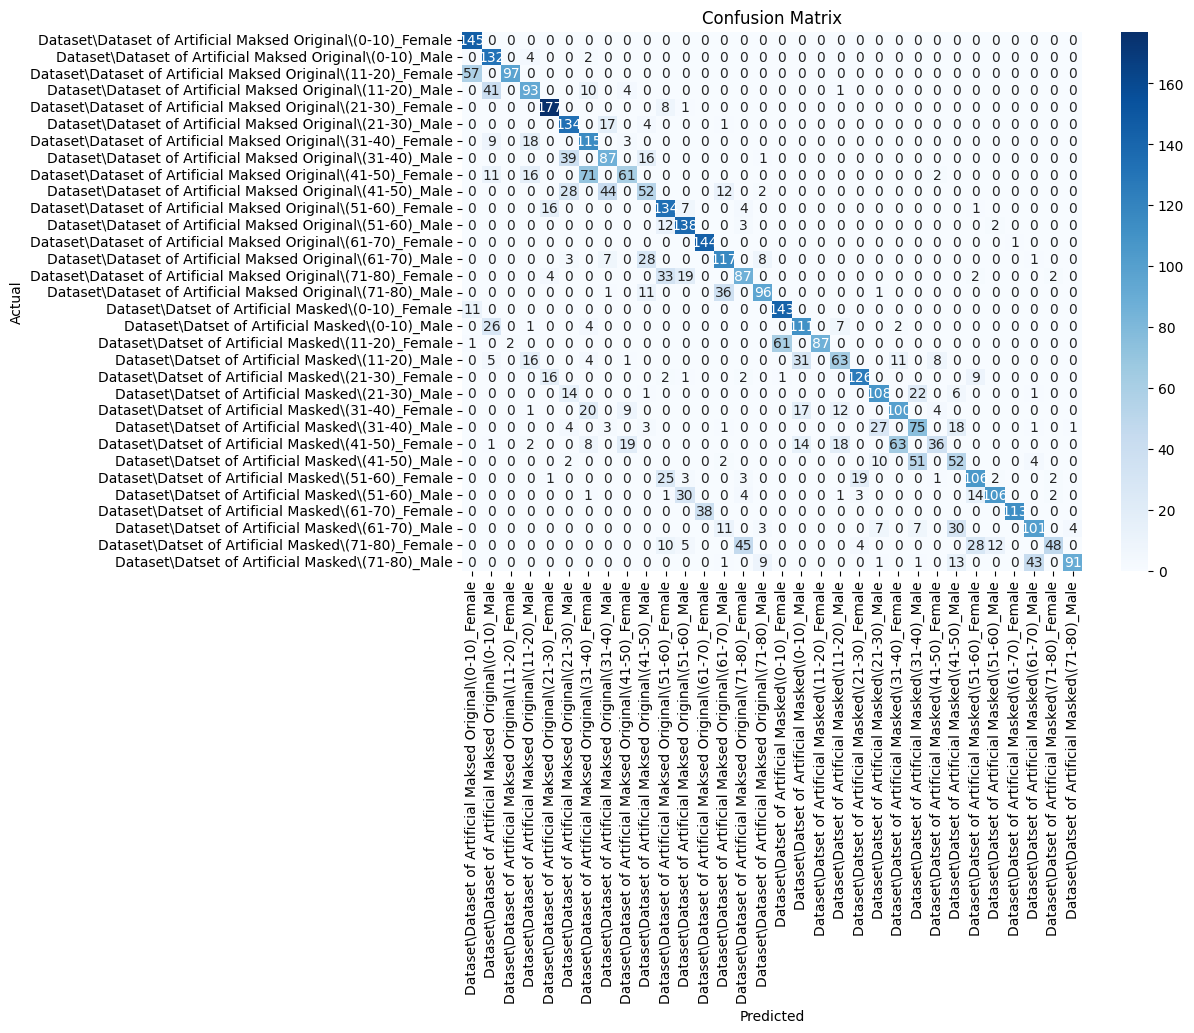

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from skimage.feature import hog
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

print("Enabling multithreading for training...")
os.environ['OMP_NUM_THREADS'] = str(os.cpu_count())

# Function to load images and extract HOG features
def load_images_from_folder(folder):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(folder):
        for file in files:
            img_path = os.path.join(subdir, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, (128, 128))
                hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
                images.append(hog_features)
                labels.append(subdir.split('/')[-1])  # Assuming subfolder name is the label
    return images, labels

# Load the dataset
data_folder = 'Dataset'
print("Loading images...")
images, labels = load_images_from_folder(data_folder)
print(f"Loaded {len(images)} images.")

# Encode labels
print("Encoding labels...")
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print(f"Encoded labels: {label_encoder.classes_}")

# Split data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Train Naive Bayes classifier
print("Training Naive Bayes classifier...")
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
print("Naive Bayes training completed.")

# Build the Keras MLP model
def create_mlp_model():
    model = Sequential()
    model.add(Dense(128, input_dim=len(X_train[0]), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier
print("Training MLP classifier with Keras...")
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
mlp_clf = KerasClassifier(model=create_mlp_model, epochs=300, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])
mlp_clf.fit(X_train, y_train)
print("MLP training completed.")

# Create an ensemble classifier using VotingClassifie
print("Creating an ensemble classifier...")
ensemble_clf = VotingClassifier(estimators=[('nb', nb_clf), ('mlp', mlp_clf)], voting='hard')
ensemble_clf.fit(X_train, y_train)
print("Ensemble training completed.")

# Predict on test set
print("Predicting on test set...")
y_pred = ensemble_clf.predict(X_test)

# Evaluate the classifier
print("Evaluating the classifier...")

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Classification Report:\n{report}")


# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
